# Solve Morris Lecar Equations with Software

### Equations

$$ C\frac{dV}{dt} = \frac{I_{inj}}{A} - I_{leak} - I_{slow} - I_{fast} $$
$$ I_{leak} = g_{leak}(V - E_{leak}) $$
$$ I_{fast} = g_{fast}(V - E_{Na}) $$
$$ m_{\infty} = 0.5(1 + tanh(\frac{V - \beta_{m}}{\gamma{m}})) $$
$$ I_{slow} = g_{slow}w(V - E_{K}) $$
$$ w_{\infty} =  0.5(1 + tanh(\frac{V - \beta_{w}}{\gamma{w}})) $$
$$ \tau_{\infty} = \frac{1}{cosh(0.5\frac{V - \beta_{w}}{\gamma_{w}})} $$
$$ \frac{dw}{dt} = \phi\frac{w_{\infty} - w}{\tau_{\infty}} $$
$$ V = V + dt\frac{dV}{dt} $$
$$ w = w + dt\frac{dw}{dt} $$

### Import required libraries

In [1]:
import pynq
import numpy as np
import Currents as I

### Define Parameters

In [2]:
A = 4*5^2
C = 2
ELeak = -70
EK = -100
ENa = -50
gFast = 20
gLeak = 2
gSlow = 20
betaM = -1.2
betaW = 0
gammaM = 18
gammaW = 10
phi = 0.15
dt = 0.1

### Define variables

Define the timeseries for the injected current where the noise is 25 mA around 40 mA. Also, define empty timeseries for the membrane potential and the slow current state.

The initial conditions are V = -70 and W = 0.000025.

In [3]:
Iinj = 40 + 25*np.random.randn(15000)
V = np.zeros(len(Iinj))
W = np.zeros(len(Iinj))

V[0] = -70
W[0] = 0.000025

IL = np.zeros(len(Iinj))
IFast = np.zeros(len(Iinj))
ISlow = np.zeros(len(Iinj))

### Find solution

In [4]:
i = 2
while i < len(Iinj):
    IL[i] = I.leakage(V[i-1], gLeak, ELeak)
    IFast[i] = I.fast(V[i-1], gFast, ENa, betaM, gammaM)
    ISlow[i], wInf, tau_w = I.slow(V[i-1], W[i-1], gSlow, EK, betaW, gammaW)
    
    dwdt = phi*(wInf - W[i-1]) / tau_w
    dvdt = (Iinj[i] - IL[i] - IFast[i] - ISlow[i]) / C
    
    W[i] = W[i-1] + dwdt*dt
    V[i] = V[i-1] + dvdt*dt
    
    i = i + 1

### Results

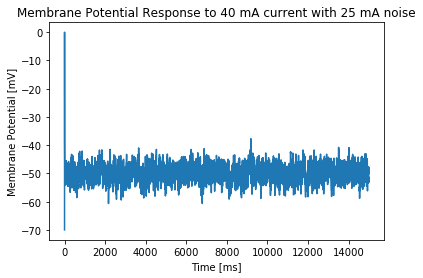

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

plt.plot(V)
plt.xlabel("Time [ms]")
plt.ylabel("Membrane Potential [mV]")
plt.title("Membrane Potential Response to 40 mA current with 25 mA noise")
plt.show()